In [407]:
import pandas as pd
import numpy as np
import datetime


from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns


In [408]:
df = pd.read_excel('/Users/markdetiberiis/Desktop/Incarceration_Data/incarceration_trends.xlsx')

In [409]:
df

,yfips,year,fips,state,county_name,total_pop,total_pop_15to64,female_pop_15to64,male_pop_15to64,aapi_pop_15to64,...,native_prison_pop_rate,white_prison_pop_rate,total_prison_adm_rate,female_prison_adm_rate,male_prison_adm_rate,aapi_prison_adm_rate,black_prison_adm_rate,latinx_prison_adm_rate,native_prison_adm_rate,white_prison_adm_rate
0,197001001,1970,1001,AL,Autauga County,24661,14154,7293,6861,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,197101001,1971,1001,AL,Autauga County,25503,14765,7585,7180,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,197201001,1972,1001,AL,Autauga County,27156,15939,8168,7771,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,197301001,1973,1001,AL,Autauga County,28453,16906,8651,8255,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,197401001,1974,1001,AL,Autauga County,29261,17578,8992,8586,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153806,201456045,2014,56045,WY,Weston County,7138,4606,2064,2542,41.0,...,NaN,NaN,86.84,NaN,NaN,NaN,NaN,NaN,NaN,NaN
153807,201556045,2015,56045,WY,Weston County,7197,4614,2070,2544,67.0,...,NaN,NaN,108.37,0.0,196.54,NaN,NaN,NaN,NaN,94.47
153808,201656045,2016,56045,WY,Weston County,7213,4582,2086,2496,81.0,...,NaN,310.04,87.30,0.0,160.26,0.0,0.0,0.0,0.0,95.40
153809,201756045,2017,56045,WY,Weston County,6986,4402,1985,2417,96.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [410]:
df = df.fillna(0)

In [411]:
df.shaape

AttributeError: 'DataFrame' object has no attribute 'shaape'

In [ ]:
df['aapi_prison_pop_rate'].count()

In [ ]:
df['black_prison_pop_rate'].count()

In [ ]:
df['latinx_prison_pop_rate'].count()

In [ ]:
df['native_prison_pop_rate'].count()

In [ ]:
df['white_prison_pop_rate'].count()

In [ ]:
total_pop = df['aapi_pop_15to64'].count() + df['aapi_pop_15to64'].count() + df['black_pop_15to64'].count() +df['latinx_pop_15to64'].count() +df['native_pop_15to64'].count() + df['white_pop_15to64'].count() 


In [ ]:
total_pop

In [143]:
df.dtypes

yfips                       int64
year                        int64
fips                        int64
state                      object
county_name                object
                           ...   
aapi_prison_adm_rate      float64
black_prison_adm_rate     float64
latinx_prison_adm_rate    float64
native_prison_adm_rate    float64
white_prison_adm_rate     float64
Length: 121, dtype: object

In [144]:
#df_prison_pops = df[['year','state','county_name','total_pop','total_pop_15to64','female_pop_15to64','male_pop_15to64','urbancity','regione','land_area','metro_area','total_jail_pop', 'female_jail_pop','male_jail_pop','white_pop_15to64','black_pop_15to64','latinx_pop_15to64','native_pop_15to64','aapi_pop_15to64']].copy()


In [ ]:
df_prison_pops

In [412]:
#Total Incarceration Population by demographic 
aapi_incarceration_pop = df['aapi_jail_pop'].sum() + df['aapi_prison_pop'].sum()
black_incarceration_pop = df['black_jail_pop'].sum() + df['black_prison_pop'].sum()
latinx_incarceration_pop = df['latinx_jail_pop'].sum() + df['latinx_prison_pop'].sum()
native_incarceration_pop = df['native_jail_pop'].sum() + df['native_prison_pop'].sum()
white_incarceration_pop = df['white_jail_pop'].sum() + df['white_prison_pop'].sum()

In [231]:
aapi_prison_pop

302632.48

In [232]:
black_prison_pop

20004597.91

In [413]:
dict_of_pops = {'aapi_incarceration_pop': aapi_incarceration_pop , 'black_incarceration_pop' : black_incarceration_pop, 'latinx_incarceration_pop' : latinx_incarceration_pop , 'native_incarceration_pop': native_incarceration_pop, 'white_incarceration_pop': white_incarceration_pop}
                

In [414]:
keys = dict_of_pops.keys()
values = dict_of_pops.values()

In [415]:
y = values

x = keys

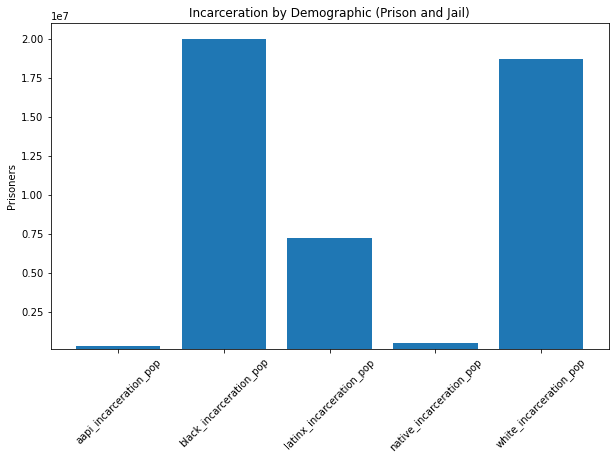

In [416]:
y = values

x = keys
#Initialize figure 

fig, ax = plt.subplots(figsize = (10,6))

ax.bar(x,y)

ax.set_ylim(75000)
ax.set_title('Incarceration by Demographic (Prison and Jail)')
#ax.set_xlabel('Genre')
ax.set_ylabel('Prisoners')
plt.xticks(rotation=45)

fig.set_facecolor('white')

In [246]:
#Jail Population by demographic 

aapi_jail_pop = df['aapi_jail_pop'].sum() 
black_jail_pop = df['black_jail_pop'].sum() 
latinx_jail_pop = df['latinx_jail_pop'].sum()
native_jail_pop = df['native_jail_pop'].sum() 
white_jail_pop = df['white_jail_pop'].sum()

In [260]:
jail_pop_by_demo = {'aapi_jail_pop': aapi_jail_pop , 'black_jail_pop' : black_jail_pop, 'latinx_jail_pop': latinx_jail_pop, 'native_jail_pop' : native_jail_pop, 'white_jail_pop' : white_jail_pop}
       

In [261]:
keys = jail_pop_by_demo.keys()
values = jail_pop_by_demo.values()

([0, 1, 2, 3, 4], <a list of 5 Text major ticklabel objects>)

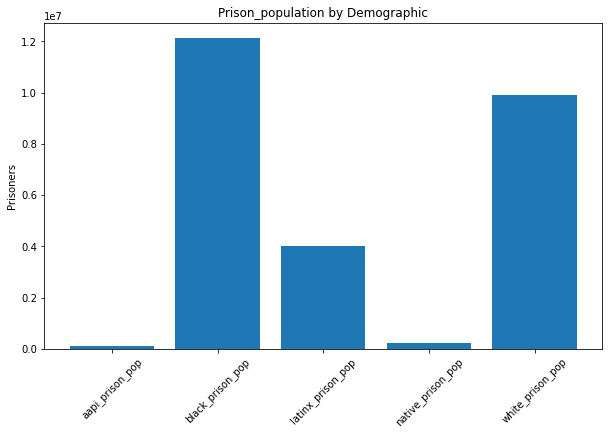

In [267]:
y = values

x = keys
#Initialize figure 

fig, ax = plt.subplots(figsize = (10,6))

ax.bar(x,y)

#ax.set_ylim(2000)
ax.set_title('Prison_population by Demographic')
#ax.set_xlabel('Genre')
ax.set_ylabel('Prisoners')
plt.xticks(rotation=45)

In [259]:
#Prison Population by demographic 

aapi_prison_pop = df['aapi_prison_pop'].sum() 
black_prison_pop = df['black_prison_pop'].sum() 
latinx_prison_pop = df['latinx_prison_pop'].sum()
native_prison_pop = df['native_prison_pop'].sum() 
white_prison_pop = df['white_prison_pop'].sum()

In [263]:
prison_pop_by_demo = {'aapi_prison_pop': aapi_prison_pop , 'black_prison_pop' : black_prison_pop, 'latinx_prison_pop': latinx_prison_pop, 'native_prison_pop' : native_prison_pop, 'white_prison_pop' : white_prison_pop}
       

In [264]:
keys = prison_pop_by_demo.keys()
values = prison_pop_by_demo.values()

([0, 1, 2, 3, 4], <a list of 5 Text major ticklabel objects>)

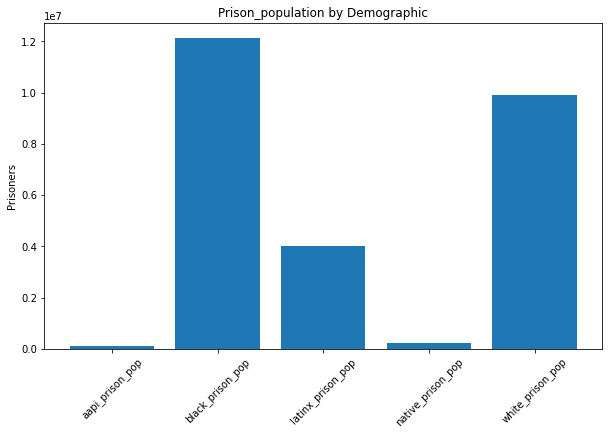

In [268]:
y = values

x = keys
#Initialize figure 

fig, ax = plt.subplots(figsize = (10,6))

ax.bar(x,y)

#ax.set_ylim(2000)
ax.set_title('Prison_population by Demographic')
#ax.set_xlabel('Genre')
ax.set_ylabel('Prisoners')
plt.xticks(rotation=45)

In [237]:
aapi_jail_rate = df['aapi_prison_pop_rate'].mean()
black_jail_rate = df['black_prison_pop_rate'].mean()
latinx_jail_rate = df['latinx_prison_pop_rate'].mean()
native_jail_rate = df['native_prison_pop_rate'].mean()
white_jail_rate = df['white_prison_pop_rate'].mean()


In [238]:
rate_by_demo = {'aapi_jail_rate': aapi_jail_rate , 'black_jail_rate' : black_jail_rate, 'latinx_jail_rate': latinx_jail_rate, 'native_jail_rate' : native_jail_rate, 'white_jail_rate' : white_jail_rate}
       

In [239]:
keys = rate_by_demo.keys()
values = rate_by_demo.values()

([0, 1, 2, 3, 4], <a list of 5 Text major ticklabel objects>)

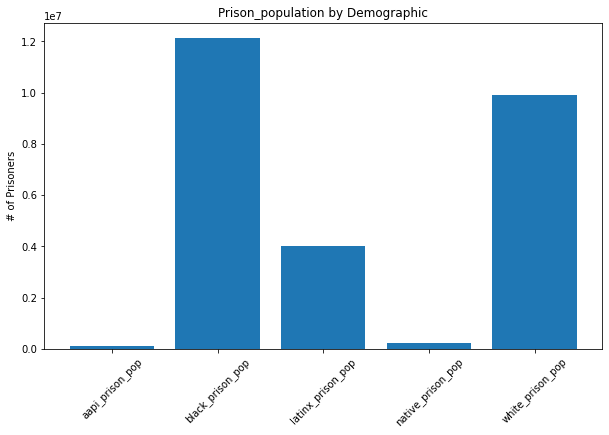

In [269]:
y = values

x = keys
#Initialize figure 

fig, ax = plt.subplots(figsize = (10,6))

ax.bar(x,y)

#ax.set_ylim(2000)
ax.set_title('Prison_population by Demographic')
#ax.set_xlabel('Genre')
ax.set_ylabel('# of Prisoners')
plt.xticks(rotation=45)

In [196]:
total_prisoners = df['total_jail_pop'].sum()
print(total_prisoners)

23207908.34


In [418]:
aapi_pop_15to64 = df['aapi_pop_15to64'].mean()
black_pop_15to64 = df['black_pop_15to64'].mean()
latinx_pop_15to64 = df['latinx_pop_15to64'].mean()
native_pop_15to64 = df['native_pop_15to64'].mean()
white_pop_15to64= df['white_pop_15to64'].mean()


In [419]:
pop_by_demo = {'aapi__pop_15to64': aapi_pop_15to64 , 'black_pop_15to64' : black_pop_15to64, 'latinx_pop_15to64': latinx_pop_15to64, 'native_pop_15to64' : native_pop_15to64, 'white_pop_15to64' : white_pop_15to64}

keys = pop_by_demo.keys()
values = pop_by_demo.values()

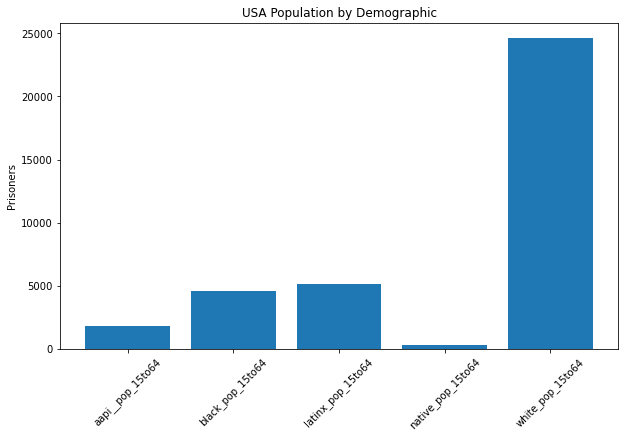

In [421]:
y = values

x = keys
#Initialize figure 

fig, ax = plt.subplots(figsize = (10,6))

ax.bar(x,y)

#ax.set_ylim(2000)
ax.set_title('USA Population by Demographic')
#ax.set_xlabel('Genre')
ax.set_ylabel('Prisoners')
plt.xticks(rotation=45)

fig.set_facecolor('white')

In [423]:
female_jail_pop = df['female_jail_pop'].sum()
male_jail_pop = df['male_jail_pop'].sum()


In [424]:
male_female_pop= {'female_jail_pop': female_jail_pop , 'male_jail_pop' : male_jail_pop}
                

In [425]:
keys = male_female_pop.keys()
values = male_female_pop.values()

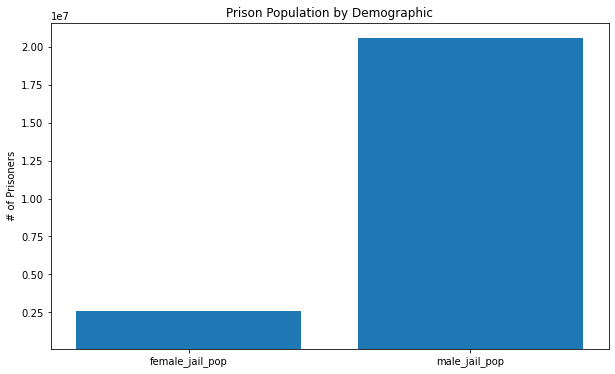

In [428]:
y = values

x = keys
#Initialize figure 

fig, ax = plt.subplots(figsize = (10,6))

ax.bar(x,y)

ax.set_ylim(75000)
ax.set_title('Prison Population by Demographic')
#ax.set_xlabel('Genre')
ax.set_ylabel('# of Prisoners')

fig.set_facecolor('white')

In [272]:
df.to_csv('/Users/markdetiberiis/Desktop/Incarceration_Data/cleaned_prison_data.csv')

In [280]:
CO_df = df.loc[(df['state'] == 'CO')].copy()

In [281]:
WA_df = df.loc[(df['state'] == 'WA')].copy()

In [283]:
MS_df = df.loc[(df['state'] == 'MS')].copy()

In [399]:
LA_df = df.loc[(df['state'] == 'LA')].copy()

In [284]:
CO_df.to_csv('/Users/markdetiberiis/Desktop/Incarceration_Data/CO_data.csv')
WA_df.to_csv('/Users/markdetiberiis/Desktop/Incarceration_Data/WA_data.csv')
MS_df.to_csv('/Users/markdetiberiis/Desktop/Incarceration_Data/MS_data.csv')
LA_df.to_csv('/Users/markdetiberiis/Desktop/Incarceration_Data/LA_data.csv')

In [357]:
CO_aapi_jail_rate = CO_df['aapi_jail_pop_rate'].mean()
CO_black_jail_rate = CO_df['black_jail_pop_rate'].mean()
CO_latinx_jail_rate = CO_df['latinx_jail_pop_rate'].mean()
CO_native_jail_rate = CO_df['native_jail_pop_rate'].mean()
CO_white_jail_rate = CO_df['white_jail_pop_rate'].mean()

In [358]:
CO_rate_by_demo = {'CO_aapi_jail_pop_rate': CO_aapi_jail_rate, 'CO_black_jail_pop_rate' : CO_black_jail_rate, 'CO_latinx_jail_pop_rate': CO_latinx_jail_rate, 'CO_native_jail_rate' : CO_native_jail_rate, 'CO_white_jail_rate' : CO_white_jail_rate}

keys = CO_rate_by_demo.keys()
values = CO_rate_by_demo.values()

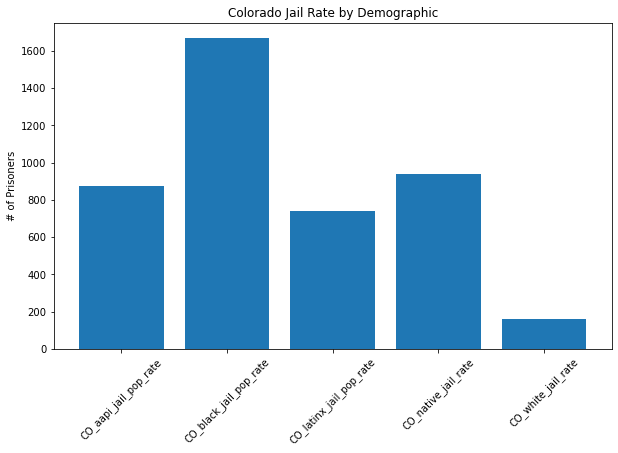

In [359]:
y = values

x = keys
#Initialize figure 

fig, ax = plt.subplots(figsize = (10,6))

ax.bar(x,y)

#ax.set_ylim(2000)
ax.set_title('Colorado Jail Rate by Demographic')
#ax.set_xlabel('Genre')
ax.set_ylabel('# of Prisoners')
plt.xticks(rotation=45)

fig.set_facecolor('white')

In [360]:
CO_aapi_jail_pop = CO_df['aapi_jail_pop'].mean()
CO_black_jail_pop = CO_df['black_jail_pop'].mean()
CO_latinx_jail_pop = CO_df['latinx_jail_pop'].mean()
CO_native_jail_pop = CO_df['native_jail_pop'].mean()
CO_white_jail_pop = CO_df['white_jail_pop'].mean()


In [361]:
CO_rate_by_demo = {'CO_aapi_jail_pop': CO_aapi_jail_pop , 'CO_black_jail_pop' : CO_black_jail_pop, 'CO_latinx_jail_pop': CO_latinx_jail_pop, 'CO_native_jail_pop' : CO_native_jail_pop, 'CO_white_jail_pop' : CO_white_jail_pop}

keys = CO_rate_by_demo.keys()
values = CO_rate_by_demo.values()

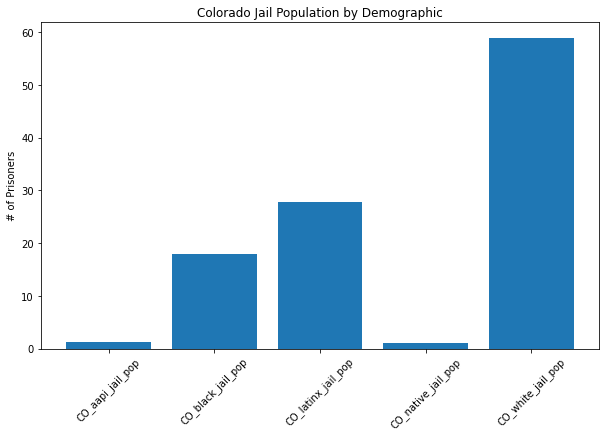

In [362]:
y = values

x = keys
#Initialize figure 

fig, ax = plt.subplots(figsize = (10,6))

ax.bar(x,y)

#ax.set_ylim(2000)
ax.set_title('Colorado Jail Population by Demographic')
#ax.set_xlabel('Genre')
ax.set_ylabel('# of Prisoners')
plt.xticks(rotation=45)

fig.set_facecolor('white')


In [363]:
CO_aapi_pop_15to64 = CO_df['aapi_pop_15to64'].mean()
CO_black_pop_15to64 = CO_df['black_pop_15to64'].mean()
CO_latinx_pop_15to64 = CO_df['latinx_pop_15to64'].mean()
CO_native_pop_15to64 = CO_df['native_pop_15to64'].mean()
CO_white_pop_15to64= CO_df['white_pop_15to64'].mean()


In [364]:
CO_pop_by_demo = {'CO_aapi__pop_15to64': CO_aapi_pop_15to64 , 'CO_black_pop_15to64' : CO_black_pop_15to64, 'CO_latinx_pop_15to64': CO_latinx_pop_15to64, 'CO_native_pop_15to64' : CO_native_pop_15to64, 'CO_white_pop_15to64' : CO_white_pop_15to64}

keys = CO_pop_by_demo.keys()
values = CO_pop_by_demo.values()

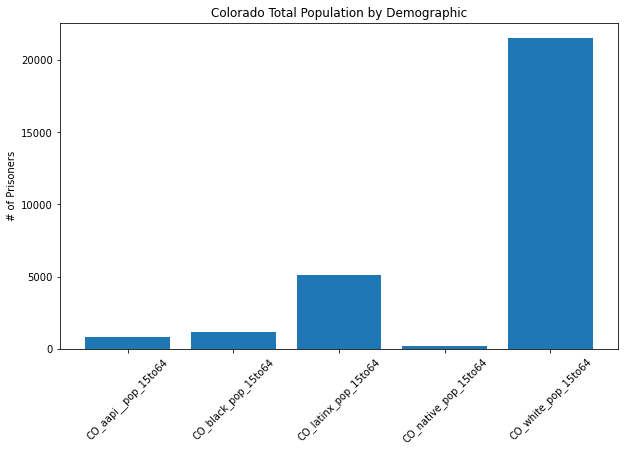

In [365]:
y = values

x = keys
#Initialize figure 

fig, ax = plt.subplots(figsize = (10,6))

ax.bar(x,y)

#ax.set_ylim(2000)
ax.set_title('Colorado Total Population by Demographic')
#ax.set_xlabel('Genre')
ax.set_ylabel('# of Prisoners')
plt.xticks(rotation=45)

fig.set_facecolor('white')

In [366]:
MS_aapi_jail_rate = MS_df['aapi_jail_pop_rate'].mean()
MS_black_jail_rate = MS_df['black_jail_pop_rate'].mean()
MS_latinx_jail_rate = MS_df['latinx_jail_pop_rate'].mean()
MS_native_jail_rate = MS_df['native_jail_pop_rate'].mean()
MS_white_jail_rate = MS_df['white_jail_pop_rate'].mean()

In [367]:
MS_rate_by_demo = {'MS_aapi_jail_pop_rate': MS_aapi_jail_rate, 'MS_black_jail_pop_rate' : MS_black_jail_rate, 'MS_latinx_jail_pop_rate': CO_latinx_jail_rate, 'CO_native_jail_rate' : MS_native_jail_rate, 'MS_white_jail_rate' : MS_white_jail_rate}

keys = MS_rate_by_demo.keys()
values = MS_rate_by_demo.values()

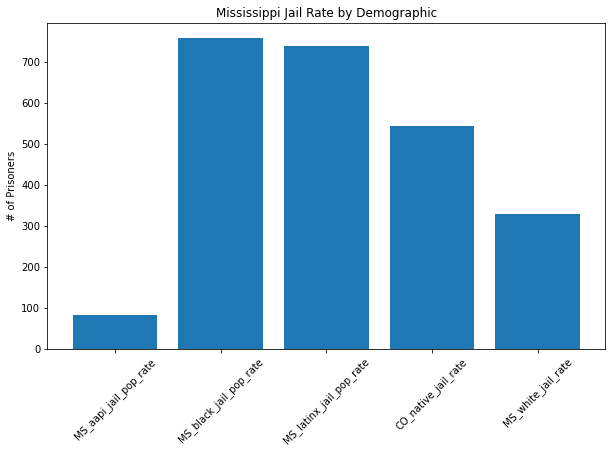

In [368]:
y = values

x = keys
#Initialize figure 

fig, ax = plt.subplots(figsize = (10,6))

ax.bar(x,y)

#ax.set_ylim(2000)
ax.set_title('Mississippi Jail Rate by Demographic')
#ax.set_xlabel('Genre')
ax.set_ylabel('# of Prisoners')
plt.xticks(rotation=45)

fig.set_facecolor('white')

In [369]:
MS_aapi_jail_pop = MS_df['aapi_jail_pop'].mean()
MS_black_jail_pop = MS_df['black_jail_pop'].mean()
MS_latinx_jail_pop = MS_df['latinx_jail_pop'].mean()
MS_native_jail_pop = MS_df['native_jail_pop'].mean()
MS_white_jail_pop = MS_df['white_jail_pop'].mean()


In [370]:
MS_pop_by_demo = {'MS_aapi_jail_pop': MS_aapi_jail_pop , 'MS_black_jail_pop' : MS_black_jail_pop, 'MS_latinx_jail_pop': MS_latinx_jail_pop, 'MS_native_jail_pop' : MS_native_jail_pop, 'MS_white_jail_pop' : MS_white_jail_pop}

keys = MS_pop_by_demo.keys()
values = MS_pop_by_demo.values()

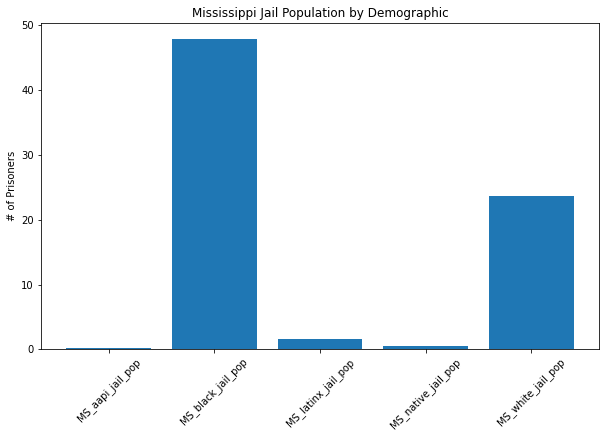

In [371]:
y = values

x = keys
#Initialize figure 

fig, ax = plt.subplots(figsize = (10,6))

ax.bar(x,y)

#ax.set_ylim(2000)
ax.set_title('Mississippi Jail Population by Demographic')
#ax.set_xlabel('Genre')
ax.set_ylabel('# of Prisoners')
plt.xticks(rotation=45)

fig.set_facecolor('white')

In [396]:
WA_aapi_jail_rate = WA_df['aapi_jail_pop_rate'].mean()
WA_black_jail_rate = WA_df['black_jail_pop_rate'].mean()
WA_latinx_jail_rate = WA_df['latinx_jail_pop_rate'].mean()
WA_native_jail_rate = WA_df['native_jail_pop_rate'].mean()
WA_white_jail_rate = WA_df['white_jail_pop_rate'].mean()

In [397]:
WA_rate_by_demo = {'WA_aapi_jail_pop_rate': WA_aapi_jail_rate, 'WA_black_jail_pop_rate' : WA_black_jail_rate, 'WA_latinx_jail_pop_rate': WA_latinx_jail_rate, 'WA_native_jail_rate' : WA_native_jail_rate, 'WA_white_jail_rate' : WA_white_jail_rate}

keys = WA_rate_by_demo.keys()
values = WA_rate_by_demo.values()

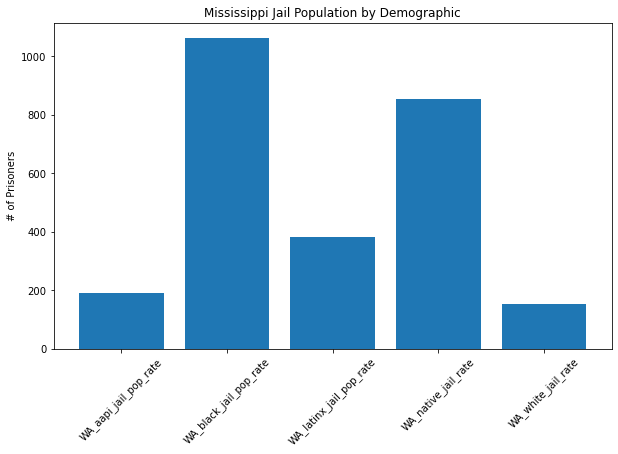

In [398]:
y = values

x = keys
#Initialize figure 

fig, ax = plt.subplots(figsize = (10,6))

ax.bar(x,y)

#ax.set_ylim(2000)
ax.set_title('Washington Jail Rate by Demographic')
#ax.set_xlabel('Genre')
ax.set_ylabel('# of Prisoners')
plt.xticks(rotation=45)

fig.set_facecolor('white')

In [372]:
MS_aapi_pop_15to64 = MS_df['aapi_pop_15to64'].mean()
MS_black_pop_15to64 = MS_df['black_pop_15to64'].mean()
MS_latinx_pop_15to64 = MS_df['latinx_pop_15to64'].mean()
MS_native_pop_15to64 = MS_df['native_pop_15to64'].mean()
MS_white_pop_15to64= MS_df['white_pop_15to64'].mean()


In [373]:
MS_pop_by_demo = {'MS_aapi__pop_15to64': MS_aapi_pop_15to64 , 'MS_black_pop_15to64' : MS_black_pop_15to64, 'MS_latinx_pop_15to64': MS_latinx_pop_15to64, 'MS_native_pop_15to64' : MS_native_pop_15to64, 'MS_white_pop_15to64' : MS_white_pop_15to64}

keys = MS_pop_by_demo.keys()
values = MS_pop_by_demo.values()

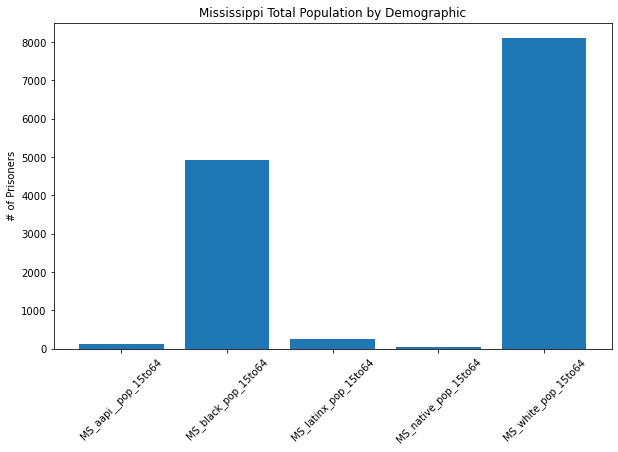

In [374]:
y = values

x = keys
#Initialize figure 

fig, ax = plt.subplots(figsize = (10,6))

ax.bar(x,y)

#ax.set_ylim(2000)
ax.set_title('Mississippi Total Population by Demographic')
#ax.set_xlabel('Genre')
ax.set_ylabel('# of Prisoners')
plt.xticks(rotation=45)

fig.set_facecolor('white')

In [375]:
WA_aapi_jail_pop = WA_df['aapi_jail_pop'].mean()
WA_black_jail_pop = WA_df['black_jail_pop'].mean()
WA_latinx_jail_pop = WA_df['latinx_jail_pop'].mean()
WA_native_jail_pop = WA_df['native_jail_pop'].mean()
WA_white_jail_pop = WA_df['white_jail_pop'].mean()


In [376]:
WA_jail_pop_by_demo = {'WA_aapi_jail_pop': WA_aapi_jail_pop , 'WA_black_jail_pop' : WA_black_jail_pop, 'WA_latinx_jail_pop': WA_latinx_jail_pop, 'WA_native_jail_pop' : WA_native_jail_pop, 'WA_white_jail_pop' : WA_white_jail_pop}

keys = WA_jail_pop_by_demo.keys()
values = WA_jail_pop_by_demo.values()

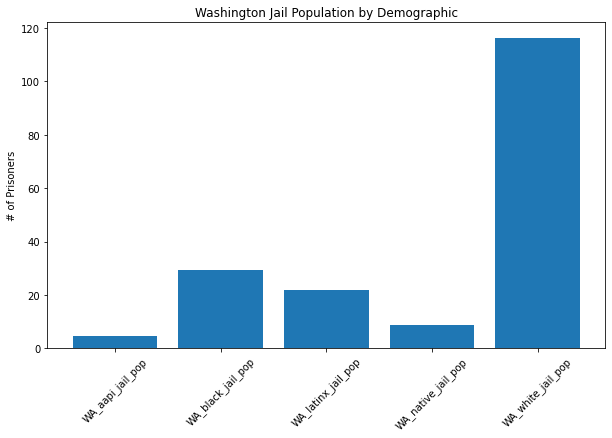

In [377]:
y = values

x = keys
#Initialize figure 

fig, ax = plt.subplots(figsize = (10,6))

ax.bar(x,y)

#ax.set_ylim(2000)
ax.set_title('Washington Jail Population by Demographic')
#ax.set_xlabel('Genre')
ax.set_ylabel('# of Prisoners')
plt.xticks(rotation=45)

fig.set_facecolor('white')


In [378]:
WA_aapi_pop_15to64 = WA_df['aapi_pop_15to64'].mean()
WA_black_pop_15to64 = WA_df['black_pop_15to64'].mean()
WA_latinx_pop_15to64 = WA_df['latinx_pop_15to64'].mean()
WA_native_pop_15to64 = WA_df['native_pop_15to64'].mean()
WA_white_pop_15to64= WA_df['white_pop_15to64'].mean()


In [379]:
WA_pop_by_demo = {'WA_aapi__pop_15to64': WA_aapi_pop_15to64 , 'WA_black_pop_15to64' : WA_black_pop_15to64, 'WA_latinx_pop_15to64': WA_latinx_pop_15to64, 'WA_native_pop_15to64' : WA_native_pop_15to64, 'WA_white_pop_15to64' : WA_white_pop_15to64}

keys = WA_pop_by_demo.keys()
values = WA_pop_by_demo.values()

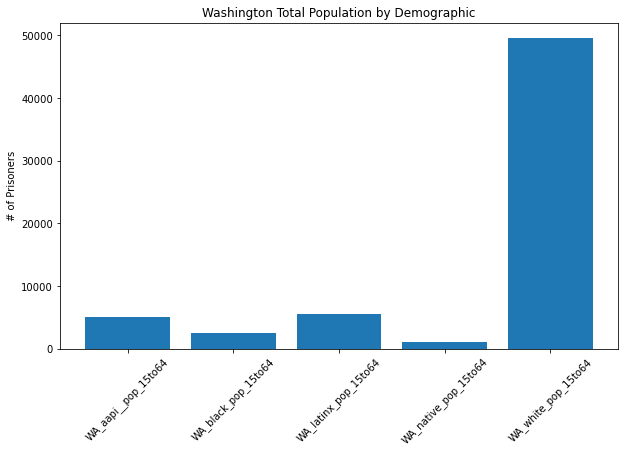

In [380]:
y = values

x = keys
#Initialize figure 

fig, ax = plt.subplots(figsize = (10,6))

ax.bar(x,y)

#ax.set_ylim(2000)
ax.set_title('Washington Total Population by Demographic')
#ax.set_xlabel('Genre')
ax.set_ylabel('# of Prisoners')
plt.xticks(rotation=45)

fig.set_facecolor('white')


In [400]:
LA_aapi_jail_pop = LA_df['aapi_jail_pop'].mean()
LA_black_jail_pop = LA_df['black_jail_pop'].mean()
LA_latinx_jail_pop = LA_df['latinx_jail_pop'].mean()
LA_native_jail_pop = LA_df['native_jail_pop'].mean()
LA_white_jail_pop = LA_df['white_jail_pop'].mean()


In [401]:
LA_jail_pop_by_demo = {'LA_aapi_jail_pop': LA_aapi_jail_pop , 'LA_black_jail_pop' : LA_black_jail_pop, 'LA_latinx_jail_pop': LA_latinx_jail_pop, 'LA_native_jail_pop' : LA_native_jail_pop, 'LA_white_jail_pop' : LA_white_jail_pop}

keys = LA_jail_pop_by_demo.keys()
values = LA_jail_pop_by_demo.values()

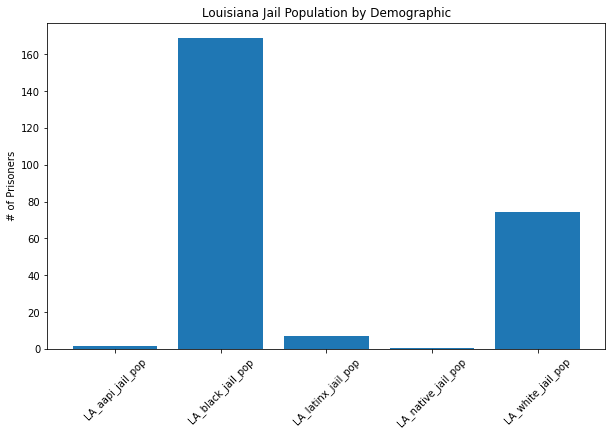

In [402]:
y = values

x = keys
#Initialize figure 

fig, ax = plt.subplots(figsize = (10,6))

ax.bar(x,y)

#ax.set_ylim(2000)
ax.set_title('Louisiana Jail Population by Demographic')
#ax.set_xlabel('Genre')
ax.set_ylabel('# of Prisoners')
plt.xticks(rotation=45)

fig.set_facecolor('white')


In [403]:
LA_aapi_pop_15to64 = LA_df['aapi_pop_15to64'].mean()
LA_black_pop_15to64 = LA_df['black_pop_15to64'].mean()
LA_latinx_pop_15to64 = LA_df['latinx_pop_15to64'].mean()
LA_native_pop_15to64 = LA_df['native_pop_15to64'].mean()
LA_white_pop_15to64= LA_df['white_pop_15to64'].mean()

In [404]:
LA_pop_by_demo = {'LA_aapi__pop_15to64': LA_aapi_pop_15to64 , 'LA_black_pop_15to64' : LA_black_pop_15to64, 'LA_latinx_pop_15to64': LA_latinx_pop_15to64, 'LA_native_pop_15to64' : LA_native_pop_15to64, 'LA_white_pop_15to64' : LA_white_pop_15to64}

keys = LA_pop_by_demo.keys()
values = LA_pop_by_demo.values()

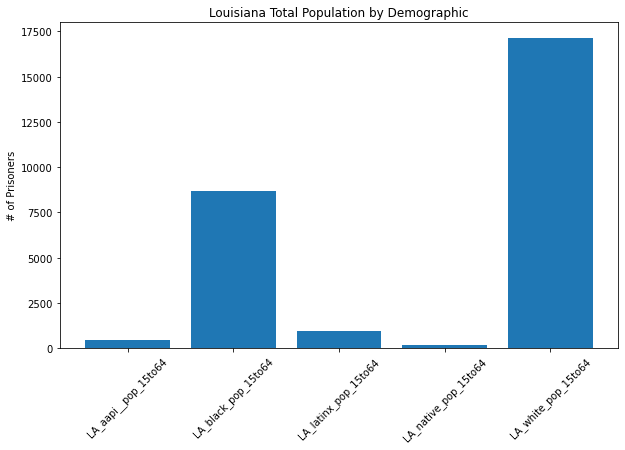

In [405]:
y = values

x = keys
#Initialize figure 

fig, ax = plt.subplots(figsize = (10,6))

ax.bar(x,y)

#ax.set_ylim(2000)
ax.set_title('Louisiana Total Population by Demographic')
#ax.set_xlabel('Genre')
ax.set_ylabel('# of Prisoners')
plt.xticks(rotation=45)

fig.set_facecolor('white')
